In [1]:
import os
import json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import albumentations as A
from sklearn import metrics as sk_metrics

In [2]:
base_dir = '../input/cassava-leaf-disease-classification/'

In [3]:

with open(os.path.join(base_dir,'label_num_to_disease_map.json')) as file:
    map_classes = json.loads(file.read())
    map_classes = {int(k) : v for k, v in map_classes.items()}
        

print(json.dumps(map_classes, indent=4))

{
    "0": "Cassava Bacterial Blight (CBB)",
    "1": "Cassava Brown Streak Disease (CBSD)",
    "2": "Cassava Green Mottle (CGM)",
    "3": "Cassava Mosaic Disease (CMD)",
    "4": "Healthy"
}


In [4]:
input_files = os.listdir(os.path.join(base_dir,'train_images'))
print(f'number of train images = {len(input_files)}')

number of train images = 21397


In [5]:
img_shapes = {}
for image_name in os.listdir(os.path.join(base_dir,'train_images'))[:300]:
    image = cv2.imread(os.path.join(base_dir,'train_images',image_name))
    img_shapes[image.shape] = img_shapes.get(image.shape, 0)+1
    
print(img_shapes)

{(600, 800, 3): 300}


In [6]:
df_train = pd.read_csv(os.path.join(base_dir, "train.csv"))

df_train["class_name"] = df_train["label"].map(map_classes)

df_train

image_id  label                           class_name
0      1000015157.jpg      0       Cassava Bacterial Blight (CBB)
1      1000201771.jpg      3         Cassava Mosaic Disease (CMD)
2       100042118.jpg      1  Cassava Brown Streak Disease (CBSD)
3      1000723321.jpg      1  Cassava Brown Streak Disease (CBSD)
4      1000812911.jpg      3         Cassava Mosaic Disease (CMD)
...               ...    ...                                  ...
21392   999068805.jpg      3         Cassava Mosaic Disease (CMD)
21393   999329392.jpg      3         Cassava Mosaic Disease (CMD)
21394   999474432.jpg      1  Cassava Brown Streak Disease (CBSD)
21395   999616605.jpg      4                              Healthy
21396   999998473.jpg      4                              Healthy

[21397 rows x 3 columns]

lets look at number of images in each class

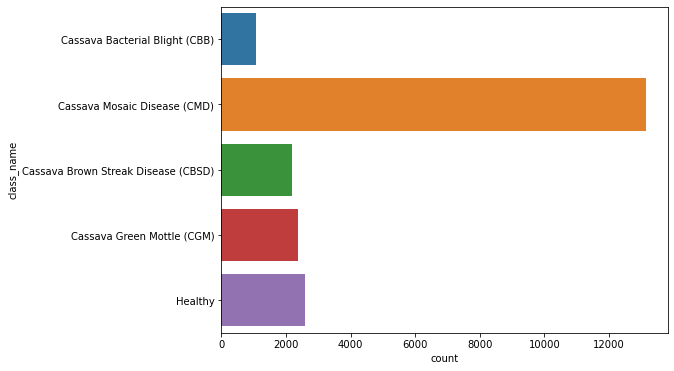

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(y='class_name',data=df_train)

as shown above that dataset has high class imbalance

In [8]:
def visualize_batch(image_ids, labels):
    plt.figure(figsize=(16, 12))
    
    for ind,(image_id,label) in enumerate(zip(image_ids, labels)):
        plt.subplot(3,3,ind+1)
        image = cv2.imread(os.path.join(base_dir,'train_images', image_id))
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.title(f'class: {label}', fontsize=12)
        plt.axis('off')
        
    plt.show()
        

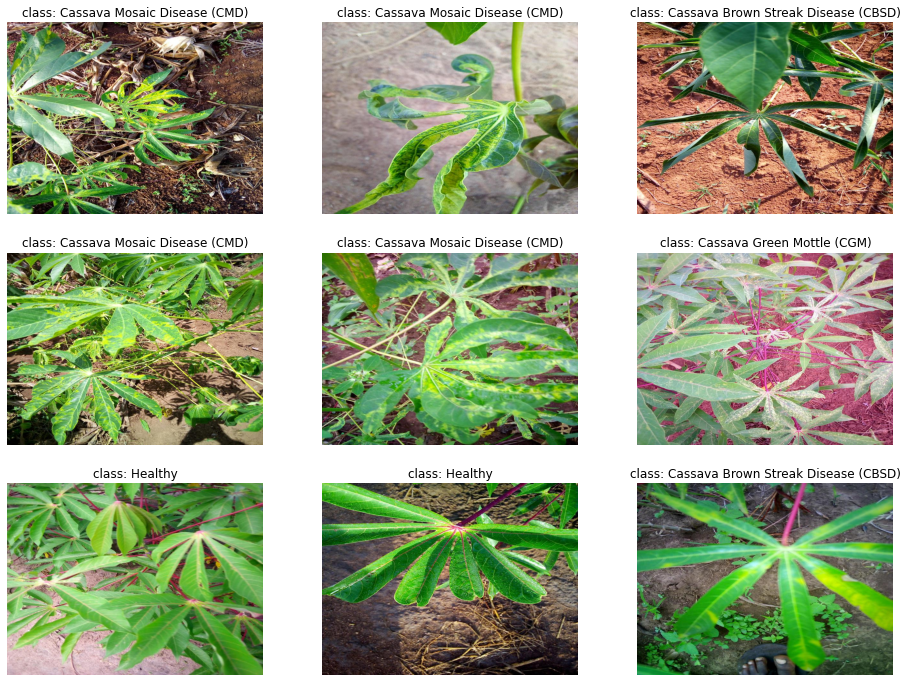

In [9]:
tmp_df = df_train.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["class_name"].values

visualize_batch(image_ids, labels)

# 0 - CBB - Cassava Bacterial Blight

Total train images for class 0: 1087


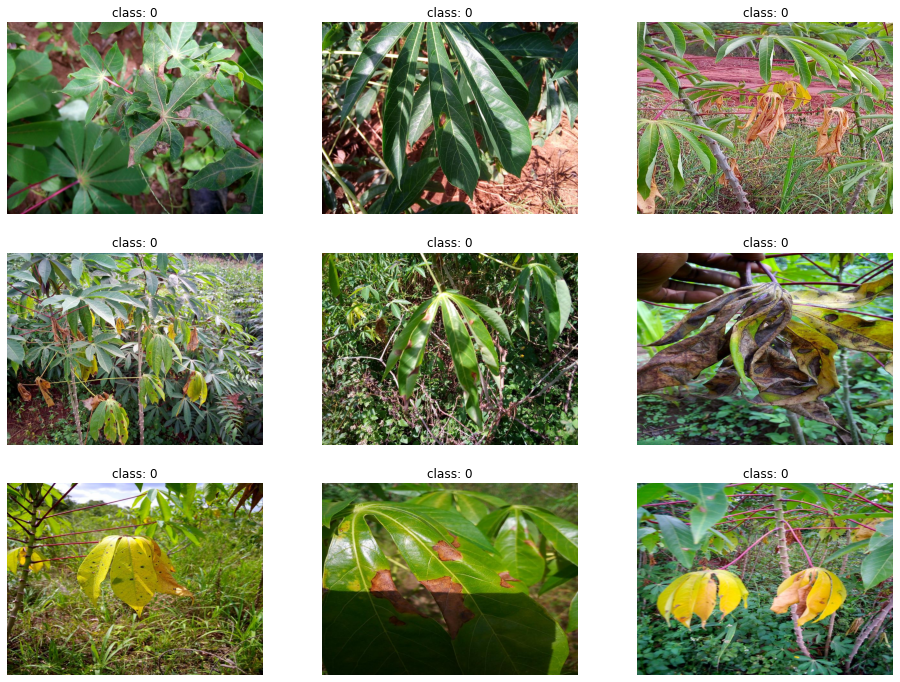

In [10]:
tmp_df=df_train[df_train['label']==0]
print(f"Total train images for class 0: {tmp_df.shape[0]}")

tmp_df = tmp_df.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["label"].values

visualize_batch(image_ids, labels)

# 1 - CBSD - Cassava Brown Streak Disease

Total train images for class 1: 2189


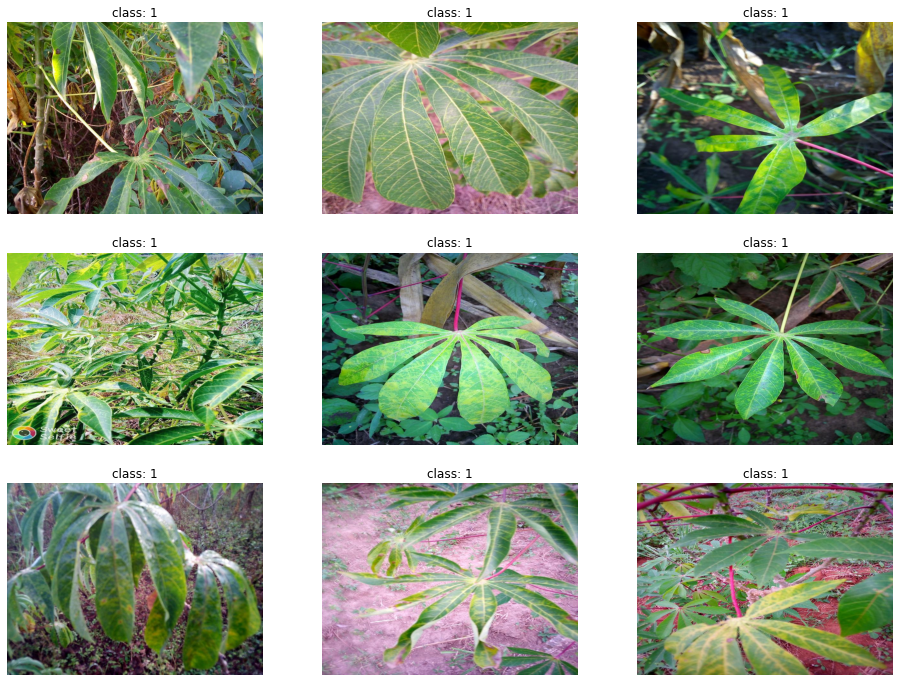

In [11]:
tmp_df = df_train[df_train["label"] == 1]
print(f"Total train images for class 1: {tmp_df.shape[0]}")

tmp_df = tmp_df.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["label"].values

visualize_batch(image_ids, labels)

# 2 - CGM - Cassava Green Mottle

Total train images for class 2: 2386


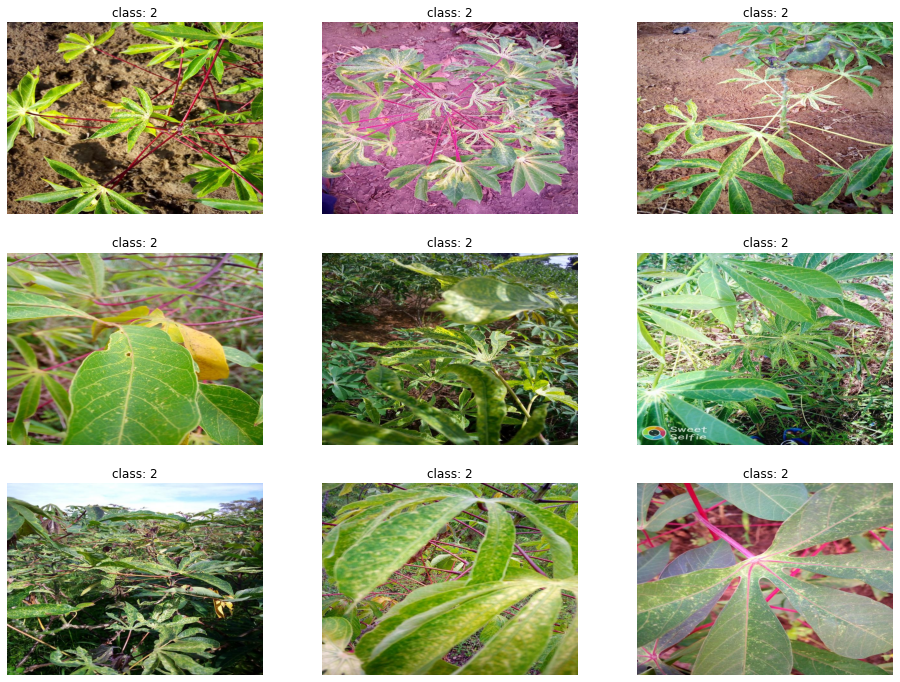

In [12]:
tmp_df = df_train[df_train["label"] == 2]
print(f"Total train images for class 2: {tmp_df.shape[0]}")

tmp_df = tmp_df.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["label"].values

visualize_batch(image_ids, labels)

# 3 - CMD - Cassava Mosaic Disease

Total train images for class 3: 13158


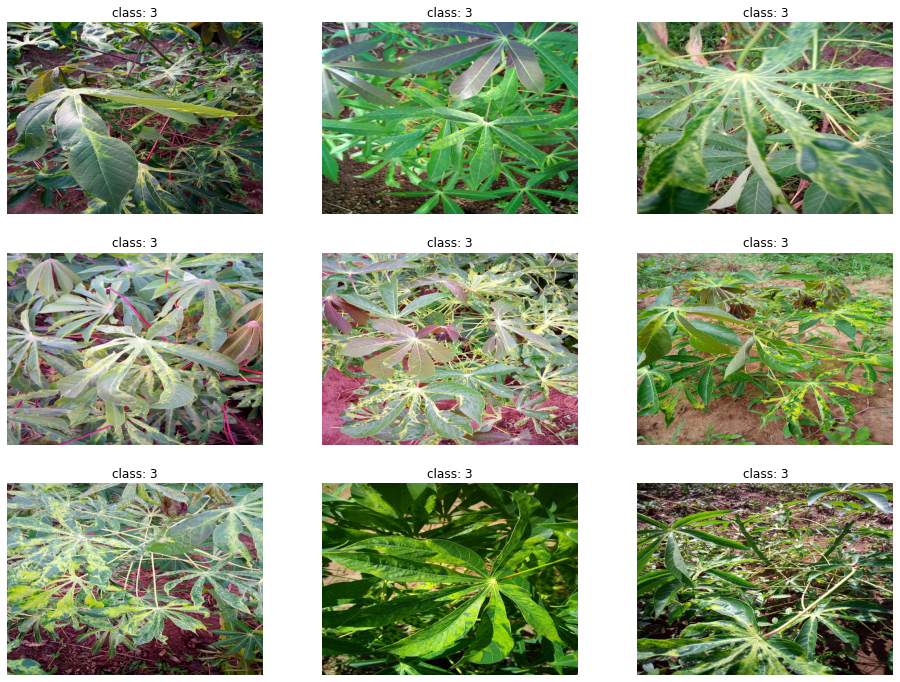

In [13]:
tmp_df = df_train[df_train["label"] == 3]
print(f"Total train images for class 3: {tmp_df.shape[0]}")

tmp_df = tmp_df.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["label"].values

visualize_batch(image_ids, labels)

# 4 - Healthy

Total train images for class 4: 2577


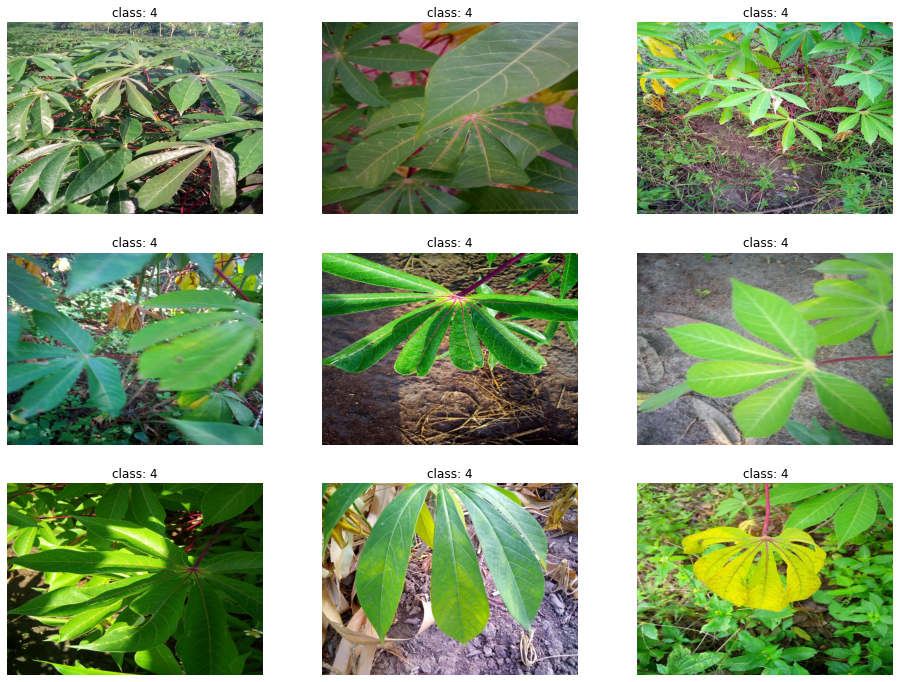

In [14]:
tmp_df = df_train[df_train["label"] == 4]
print(f"Total train images for class 4: {tmp_df.shape[0]}")

tmp_df = tmp_df.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["label"].values

visualize_batch(image_ids, labels)

# Augmentation Examples

In [15]:
def plot_augmentation(image_id, transform):
    plt.figure(figsize=(16, 4))
    img = cv2.imread(os.path.join(base_dir, "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.axis("off")

    plt.subplot(1, 3, 2)
    x = transform(image=img)["image"]
    plt.imshow(x)
    plt.axis("off")

    plt.subplot(1, 3, 3)
    x = transform(image=img)["image"]
    plt.imshow(x)
    plt.axis("off")
    
    plt.show()

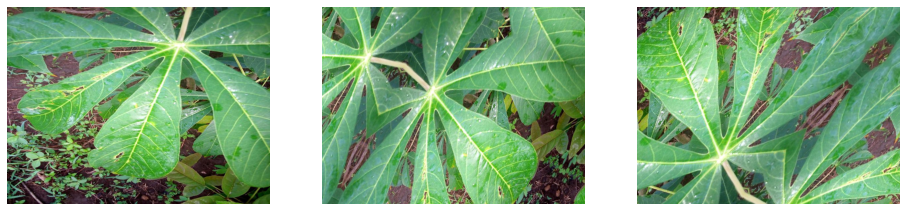

In [16]:
transform_shift_scale_rotate = A.ShiftScaleRotate(
    p=1.0, 
    shift_limit=(-0.3, 0.3), 
    scale_limit=(-0.1, 0.1), 
    rotate_limit=(-180, 180), 
    interpolation=0, 
    border_mode=4, 
)

plot_augmentation("1003442061.jpg", transform_shift_scale_rotate)